In [1]:
# We will 3 main classes
# 1. MODULE - Contains Models, losses, & optimization techniques
# 2. DATAMODULE - Provides data loaders for training and validation
# 3. TRAINER - Combines the two classes.

# Utility to register functions as methods in a class

In [2]:
import time
import numpy as np
import torch
from d2l import torch as d2l
from torch import nn

In [7]:
# Creating Utilities.
# The following function allows us to register functions as methods in a class on creation.

def add_to_class(Class): #@save
    """
        Registers functions as methods in a created class.
    """

    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [4]:
# USAGE

# We plan to implement a class A with a method 'do'.
# In one Jupyter cell we can declare A, and in another cell, we can define 'do'.


class A:

    def __init__(self):
        self.b = 1

a = A()


In [8]:
# Now we define 'do' as a method, but outside the scope of Class A.
# We add it to Class A via the decorator @add_to_class defined above.

@add_to_class(A)
def do(self):
    """
        Method for Class A. 
        Just printing stuff from init of Class A.
    """
    print("Class Attribute 'b' is : ", self.b)

a.do()


Class Attribute 'b' is :  1


# Utility class to save all arguments in a class's __init__ as class attributes

In [12]:
# This allows us to extend constructor call signature without additional code.

class HyperParameters: #@save
    """
        The base class of Hyperparameters.
    """

    def save_hyperparameters(self, ignore = []):
        """
            Save function arguments into class attributes.
        """
        """
            frame = inspect.currentframe().f_back
            _, _, _, local_vars = inspect.getargvalues(frame)
            self.hparams = { k:v for k, v in local_vars.items()
                                if k not in set(ignore + ['self']) and not k.startswith('_')
            for k, v in self.hparams.items():
                setattr(self, k, v)
        """
        
        raise NotImplemented
        

In [14]:
# For now, we inherit from the fully implemented Hyperparameter Class saved in d2l.

# Creating Class B

class B(d2l.HyperParameters):
    def __init__(self, a,b,c):
        self.save_hyperparameters(ignore = ['c'])
        print('self.a =', self.a, 'self.b = ', self.b)
        print('There is no self.c = ', not hasattr(self, 'c'))

b = B(a =1, b = 2, c =3)

self.a = 1 self.b =  2
There is no self.c =  True


# Utliity to plot progress interactively while it is going on.

In [15]:
# The draw method plots a point (x, y) in the figure, 
# with label specified in the legend.
# every_n is used for line smoothening

class ProgressBoard(d2l.HyperParameters): #@save
    """
        The board that plots data points in animation.
    """

    def __init__(self, xlabel=None, ylabel = None, xlim = None,
                     ylim = None, xscale = 'linear', yscale = 'linear',
                     ls = ['-', '--', '-.', ':'], colors = ['C0', 'C1', 'C2', 'C3'],
                     fig = None, axes = None, figsize = (3.5, 2.5), display = True):

        self.save_hyperparameters()

    def draw(self, x, y, label, every_n = 1):
        """
            Function to plot  a point (x, y) in the figure with label in legend.
        """
        """
            Point = collections.namedtuple('Point', ['x', 'y'])
            if not hasattr(self, 'raw_points'):
                self.raw_points = collections.OrderedDict()
                self.data = collections.OrderedDict()
            if label not in self.raw_points:
                self.raw_points[label] = []
                self.data[label] = []
            points = self.raw_points[label]
            line = self.data[label]
            points.append(Point(x, y))
            if len(points) != every_n:
                return
            mean = lambda x: sum(x) / len(x)
            line.append(Point(mean([p.x for p in points]),
                              mean([p.y for p in points])))
            points.clear()
            if not self.display:
                return
            d2l.use_svg_display()
            if self.fig is None:
                self.fig = d2l.plt.figure(figsize=self.figsize)
            plt_lines, labels = [], []
            for (k, v), ls, color in zip(self.data.items(), self.ls, self.colors):
                plt_lines.append(d2l.plt.plot([p.x for p in v], [p.y for p in v],
                                              linestyle=ls, color=color)[0])
                labels.append(k)
            axes = self.axes if self.axes else d2l.plt.gca()
            if self.xlim: axes.set_xlim(self.xlim)
            if self.ylim: axes.set_ylim(self.ylim)
            if not self.xlabel: self.xlabel = self.x
            axes.set_xlabel(self.xlabel)
            axes.set_ylabel(self.ylabel)
            axes.set_xscale(self.xscale)
            axes.set_yscale(self.yscale)
            axes.legend(plt_lines, labels)
            display.display(self.fig)
            display.clear_output(wait=True)
        """
        raise NotImplemented

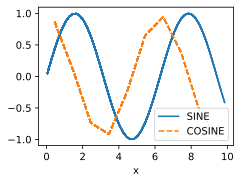

In [16]:
# Drawing Sin and Cos curves with different smoothness.

board = d2l.ProgressBoard('x')
for x in np.arange(0 ,10, 0.1):
    board.draw(x, np.sin(x), 'SINE', every_n =2)
    board.draw(x, np.cos(x), 'COSINE', every_n =10)